In [1]:
import os
import sys
import waveformDumper
import numpy as np
import matplotlib.pyplot as plt
import struct
import pandas as pd

from matplotlib import colors
from matplotlib import ticker

In [28]:
np.sqrt(0.01**2 + 0.02**2)

0.022360679774997897

In [29]:
np.sqrt(0.01**2 + 0.02**2 + 0.1**2)

0.10246950765959599

In [25]:
import matplotlib

nice_fonts = {
    "text.usetex": True,
    "font.size": 18,
    "axes.formatter.limits": (-2, 5),
    'xtick.direction': 'in',
    'ytick.direction': 'in',
}

matplotlib.rcParams.update(nice_fonts)

c1 = '#dc2f18'
c2 = '#2d82b7'
#c3 = '#aaae8e'
c3 = '#885a89'
c4 = '#07004d'

mcols = [c2, c3, c4, 'maroon']

In [3]:
import scipy
from scipy.signal import find_peaks

def substract_peds(data):
    peds = np.array([np.argmax(np.bincount(np.abs(data[i]))) for i in range(len(data))])
    peds = peds[:, np.newaxis]
    return data - peds

def get_peaks(data):
    all_peaks, all_heights = [], []
    for i in range(len(data)):
        peaks, heights = find_peaks(data[i], height=100, distance=150)
        #print(peaks, heights['peak_heights'])
        all_peaks +=list(peaks)
        all_heights += list(heights['peak_heights'])

    return np.array(all_peaks).flatten(), np.array(all_heights).flatten()


In [4]:
filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25080_ch_0_all.npy"
dat0 = np.load(filename, allow_pickle=True)

filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25080_ch_7_all.npy"
dat7 = np.load(filename, allow_pickle=True)

filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25080_srcid_3_ch_10_0000.npy"
dat10 = np.load(filename, allow_pickle=True)

filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25080_srcid_3_ch_17_0000.npy"
dat17 = np.load(filename, allow_pickle=True)

filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25080_srcid_4_ch_40_0000.npy"
dat40 = np.load(filename, allow_pickle=True)

filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25080_srcid_4_ch_47_0000.npy"
dat47 = np.load(filename, allow_pickle=True)

In [18]:
dat0 = dat0.astype(np.int16)
dat7 = dat7.astype(np.int16)
dat10 = dat10.astype(np.int16)
dat17 = dat17.astype(np.int16)
dat40 = dat40.astype(np.int16)
dat47 = dat47.astype(np.int16)

In [19]:
dat0 = substract_peds(dat0)
dat7 = substract_peds(dat7)
dat10 = substract_peds(dat10)
dat17 = substract_peds(dat17)
dat40 = substract_peds(dat40)
dat47 = substract_peds(dat47)

In [20]:
dat0.shape, dat7.shape

((44355, 65536), (44355, 65536))

In [21]:
p0, h0 = get_peaks(dat0)
p7, h7 = get_peaks(dat7)

In [22]:
p10, h10 = get_peaks(dat10)
p17, h17 = get_peaks(dat17)

In [23]:
p40, h40 = get_peaks(dat40)
p47, h47 = get_peaks(dat47)

Text(0, 0.5, '$\\mathrm{\\bf Events}$')

python(47998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


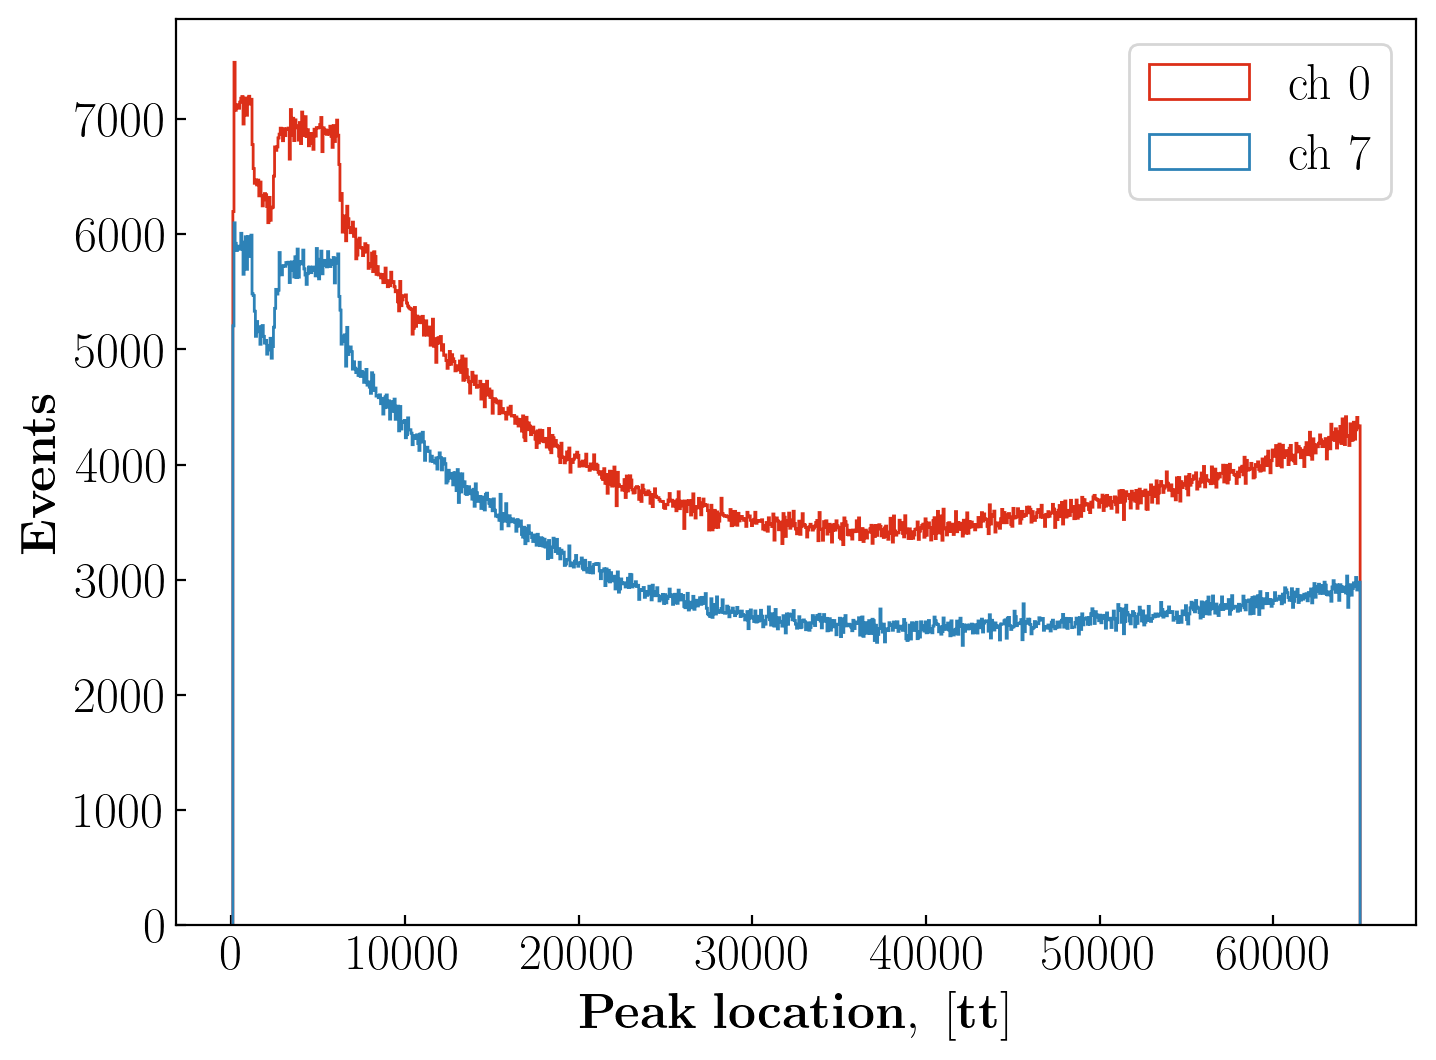

In [35]:
fig, ax = plt.subplots(figsize = [8, 6], dpi=200)

bins, lims = 1000, [100, 65000]
ax.hist(p0, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 0}$')
ax.hist(p7, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 7}$')

ax.legend(loc='best')

ax.set_xlabel(r'$\mathrm{\bf Peak\ location,~[tt]}$')
ax.set_ylabel(r'$\mathrm{\bf Events}$')

#ax.hist(p10, bins, lims, histtype='step', color=c3)
#ax.hist(p17, bins, lims, histtype='step', color=c4)

#ax.hist(p40, bins, lims, histtype='step', color=c1, ls='--')
#ax.hist(p47, bins, lims, histtype='step', color=c2, ls='--')

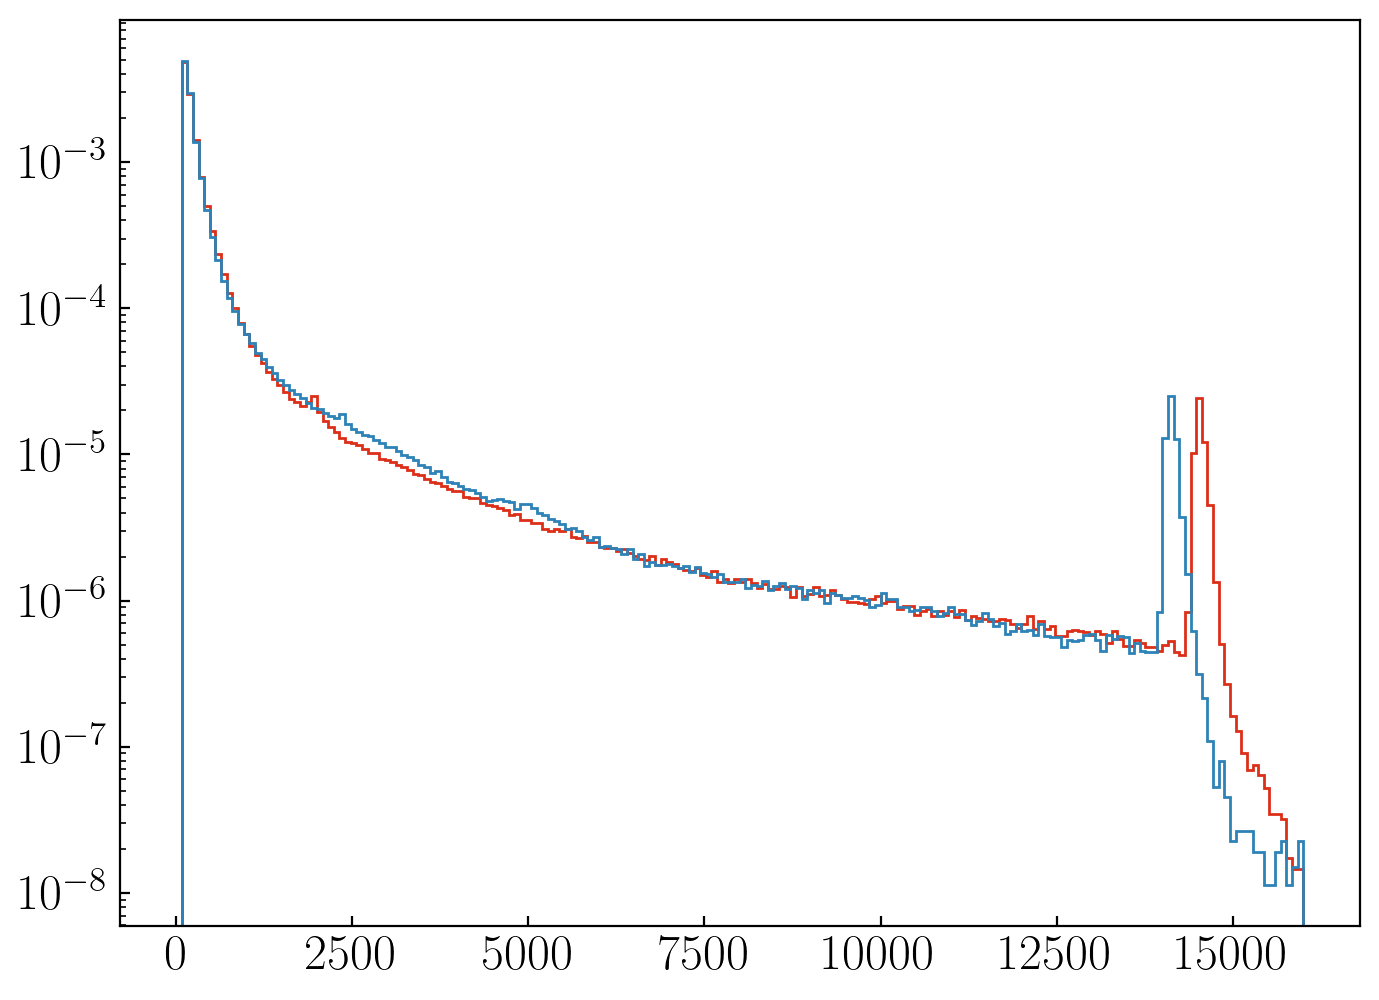

In [36]:
fig, ax = plt.subplots(figsize = [8, 6], dpi=200)

bins, lims = 200, [0, 16000]
ax.hist(h0, bins, lims, histtype='step', color=c1, density=True)
ax.hist(h7, bins, lims, histtype='step', color=c2, density=True)

#ax.hist(h10, bins, lims, histtype='step', color=c3, density=True)
#ax.hist(h17, bins, lims, histtype='step', color=c4, density=True)

#ax.hist(h40, bins, lims, histtype='step', color=c1, ls='--', density=True)
#ax.hist(h47, bins, lims, histtype='step', color=c2, ls='--', density=True)

ax.set_yscale('log')

In [5]:
path = '/Users/vitaliy/Desktop/daq/mdoc/runApril/'
files = [ "adc_data_run_25080_ch_0_all.npy", "adc_data_run_25080_ch_7_all.npy", 
         "adc_data_run_25080_ch_10_all.npy", "adc_data_run_25080_ch_17_all.npy",
         "adc_data_run_25080_ch_30_all.npy", "adc_data_run_25080_ch_37_all.npy",
         "adc_data_run_25080_ch_40_all.npy", "adc_data_run_25080_ch_47_all.npy"
]

In [6]:
ps, hs = [], []

In [7]:
for file in files:
    filename = path+file
    dat = np.load(filename, allow_pickle=True)
    dat = dat.astype(np.int16)
    dat = substract_peds(dat)

    p0, h0 = get_peaks(dat)
    ps.append(p0)
    hs.append(h0)
    del dat

Text(0, 0.5, '$\\mathrm{\\bf Events}$')

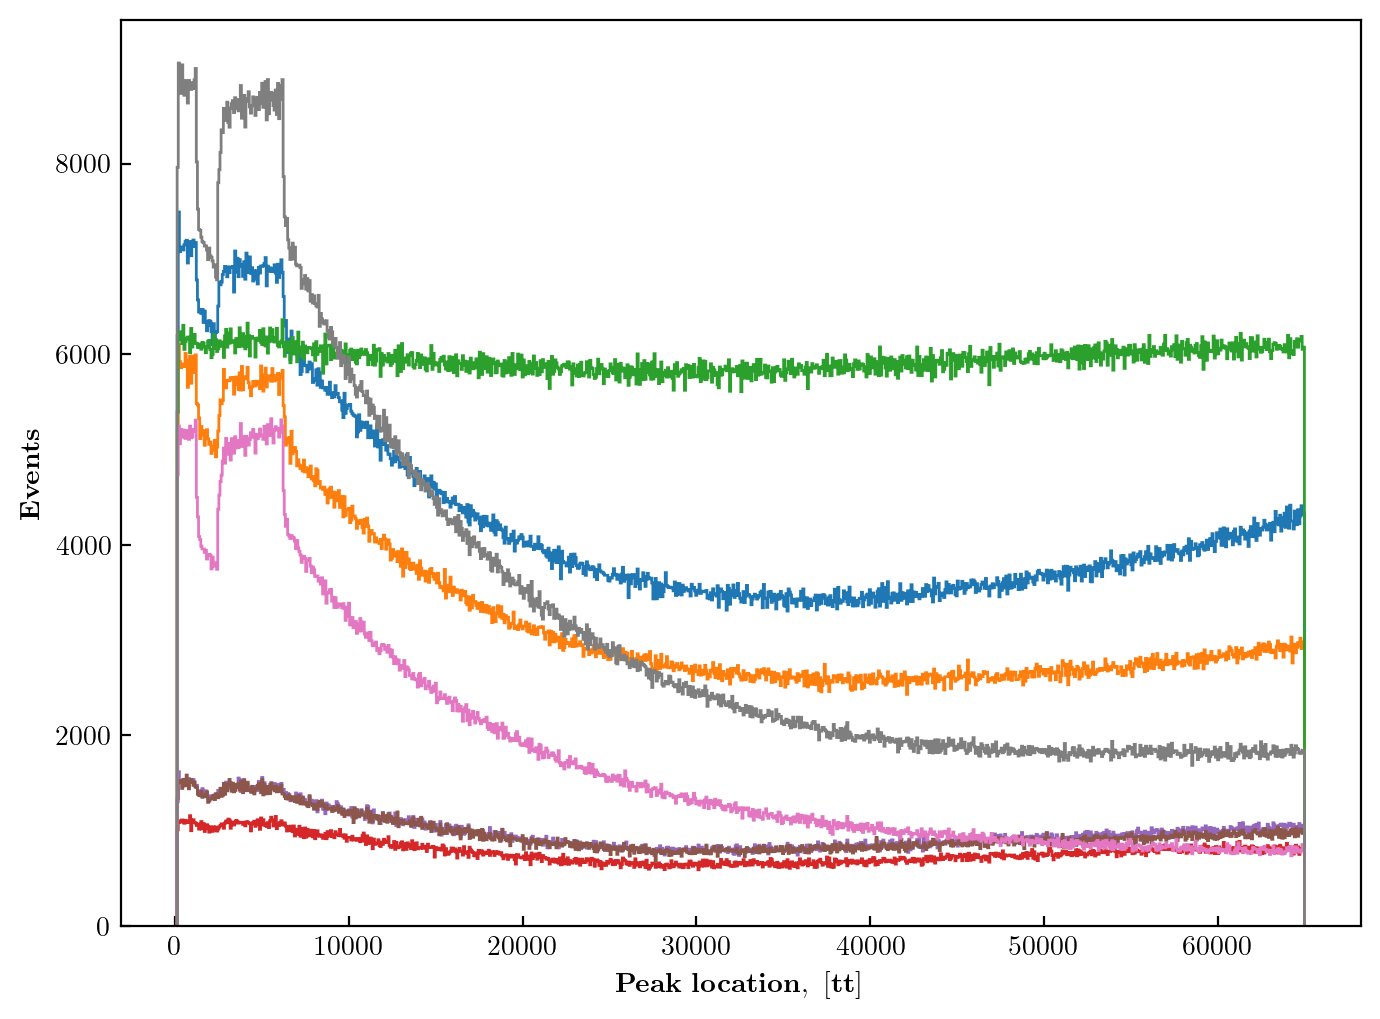

In [8]:
fig, ax = plt.subplots(figsize = [8, 6], dpi=200)

bins, lims = 1000, [100, 65000]

for p in ps:
    ax.hist(p, bins, lims, histtype='step', label=r'$\mathrm{ch\ 0}$')

#ax.legend(loc='best')

ax.set_xlabel(r'$\mathrm{\bf Peak\ location,~[tt]}$')
ax.set_ylabel(r'$\mathrm{\bf Events}$')

#ax.hist(p10, bins, lims, histtype='step', color=c3)
#ax.hist(p17, bins, lims, histtype='step', color=c4)

#ax.hist(p40, bins, lims, histtype='step', color=c1, ls='--')
#ax.hist(p47, bins, lims, histtype='step', color=c2, ls='--')

Text(0.5, 0.98, 'Run 25080')

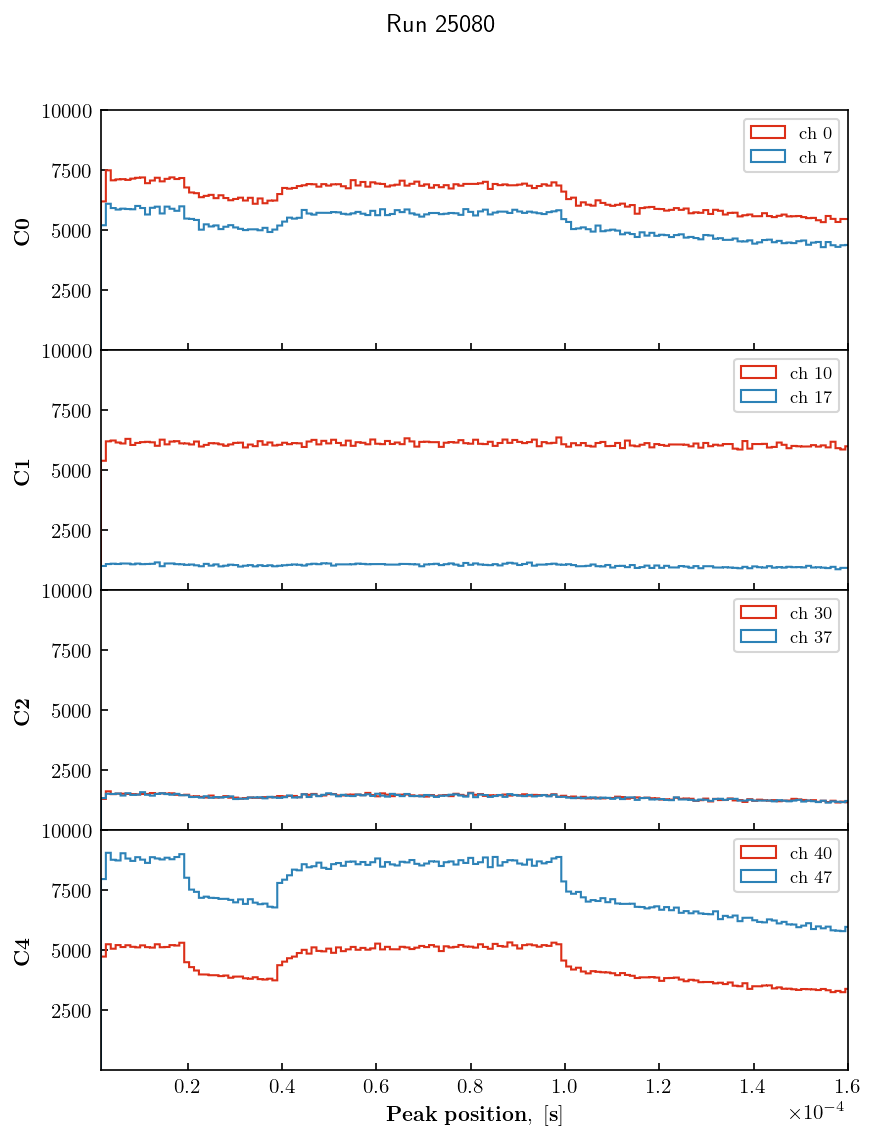

In [9]:
fig= plt.figure(figsize=[6, 8], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.20]
rect2 = [0.12, 0.30, 0.83, 0.20]
rect3 = [0.12, 0.50, 0.83, 0.20]
rect4 = [0.12, 0.70, 0.83, 0.20]

#xxs = np.arange(65536) * 16e-6
bins, lims = 1000, [100*16e-9, 65000*16e-9]

ax1 = fig.add_axes(rect4)
ax2 = fig.add_axes(rect3)
ax3 = fig.add_axes(rect2)
ax4 = fig.add_axes(rect1)

ax1.xaxis.set_tick_params(labelbottom=False)
ax2.xaxis.set_tick_params(labelbottom=False)
ax3.xaxis.set_tick_params(labelbottom=False)

ax1.hist(ps[0]*16e-9, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 0}$')
ax1.hist(ps[1]*16e-9, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 7}$')

ax2.hist(ps[2]*16e-9, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 10}$')
ax2.hist(ps[3]*16e-9, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 17}$')

ax3.hist(ps[4]*16e-9, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 30}$')
ax3.hist(ps[5]*16e-9, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 37}$')

ax4.hist(ps[6]*16e-9, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 40}$')
ax4.hist(ps[7]*16e-9, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 47}$')

lims = [100*16e-9, 10e3 * 16e-9]
ax1.set_xlim(lims)
ax2.set_xlim(lims)
ax3.set_xlim(lims)
ax4.set_xlim(lims)

ylims = [0, 10e3]
ax1.set_ylim(ylims)
ax2.set_ylim(ylims)
ax3.set_ylim(ylims)
ax4.set_ylim(ylims)

ax1.legend(loc='best', fontsize='small')
ax2.legend(loc='best', fontsize='small')
ax3.legend(loc='best', fontsize='small')
ax4.legend(loc='best', fontsize='small')



ax1.set_yticks(np.arange(2500, 10001, 2500))
ax2.set_yticks(np.arange(2500, 10001, 2500))
ax3.set_yticks(np.arange(2500, 10001, 2500))
ax4.set_yticks(np.arange(2500, 10001, 2500))

ax1.set_ylabel(r'$\mathrm{\bf C0}$')
ax2.set_ylabel(r'$\mathrm{\bf C1}$')
ax3.set_ylabel(r'$\mathrm{\bf C2}$')
ax4.set_ylabel(r'$\mathrm{\bf C4}$')

#ax3.set_xlabel(r'$\mathrm{\bf Time,\ [tt]}$')
ax4.set_xlabel(r'$\mathrm{\bf Peak\ position,\ [s]}$')

fig.suptitle(f"Run 25080")

In [10]:
arrowprops=dict(arrowstyle="<|-|>, head_width=0.15, head_length=0.5", color="k", connectionstyle="arc3, rad=0", lw=0.6, patchA=None, patchB=None)
arrowprops2=dict(arrowstyle="-|>, head_width=0.15, head_length=0.5", color="k", connectionstyle="arc3, rad=0", lw=0.6, patchA=None, patchB=None)

Text(0, 0.5, '$\\mathrm{\\bf Events}$')

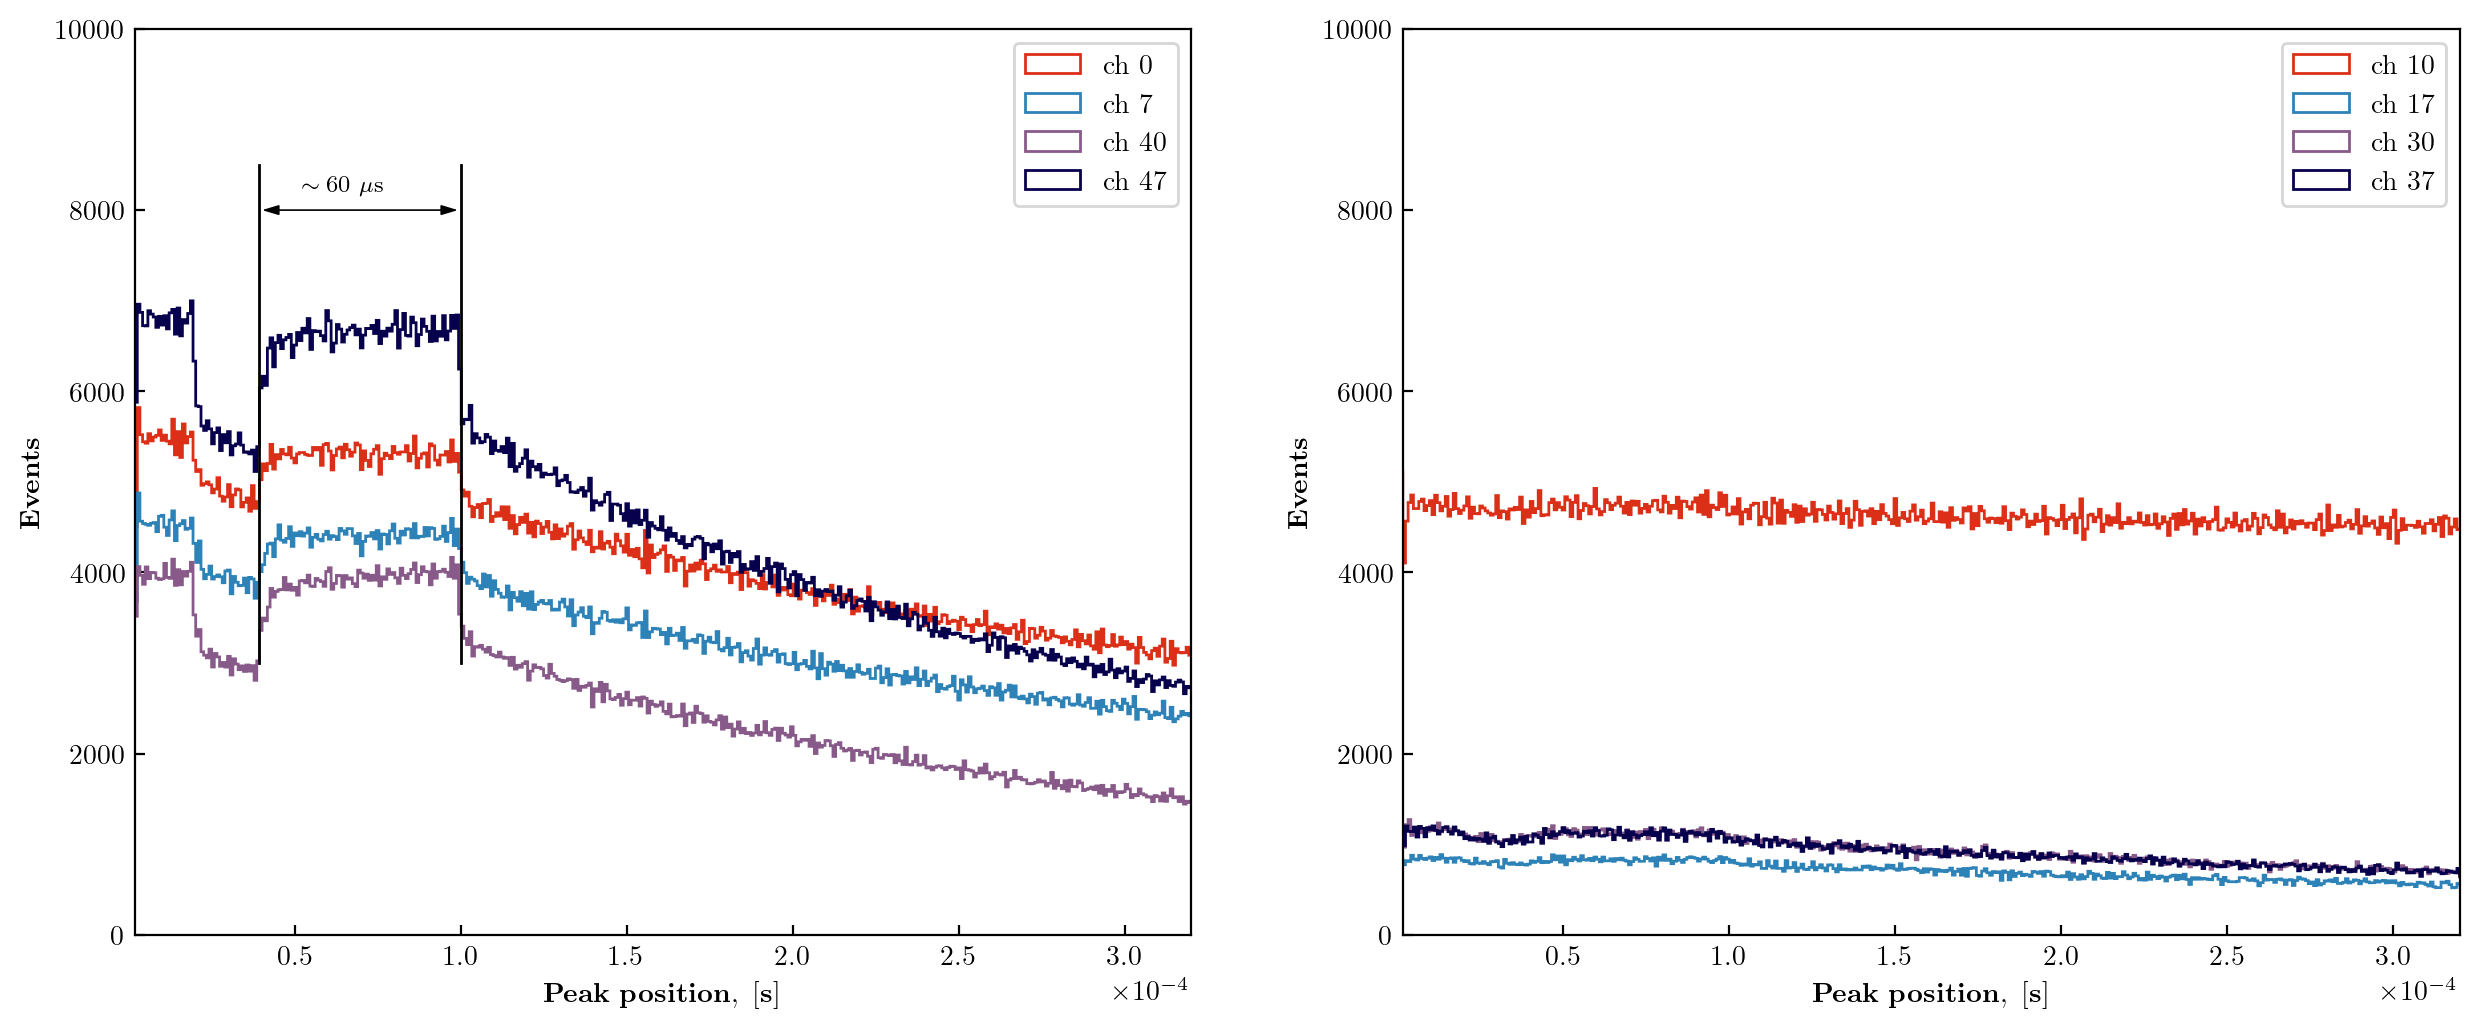

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 6], dpi=200)

bins, lims = 1000, [0*16e-9, 50000*16e-9]

ax1.hist(ps[0]*16e-9, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 0}$')
ax1.hist(ps[1]*16e-9, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 7}$')
ax1.hist(ps[6]*16e-9, bins, lims, histtype='step', color=c3, label=r'$\mathrm{ch\ 40}$')
ax1.hist(ps[7]*16e-9, bins, lims, histtype='step', color=c4, label=r'$\mathrm{ch\ 47}$')

ax2.hist(ps[2]*16e-9, bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 10}$')
ax2.hist(ps[3]*16e-9, bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 17}$')
ax2.hist(ps[4]*16e-9, bins, lims, histtype='step', color=c3, label=r'$\mathrm{ch\ 30}$')
ax2.hist(ps[5]*16e-9, bins, lims, histtype='step', color=c4, label=r'$\mathrm{ch\ 37}$')

ax1.legend(loc='best')
ax2.legend(loc='best')
lims = [100*16e-9, 20e3 * 16e-9]
ax1.set_xlim(lims)
ax2.set_xlim(lims)

ax1.set_ylim(0, 10000)
ax2.set_ylim(0, 10000)

ax1.plot([3.9e-5, 3.9e-5], [3000, 8500], color='k', lw=1)
ax1.plot([10e-5, 10e-5], [3000, 8500], color='k', lw=1)

ax1.annotate("", (3.83e-5, 8000), xycoords='data', xytext=(10.07e-5, 8000), textcoords='data', va='center', ha='center', arrowprops=arrowprops)
ax1.text(5.2e-5, 8200, r'$\mathrm{\sim 60~ \mu s}$', fontsize='small', math_fontfamily='dejavuserif')

ax1.set_xlabel(r'$\mathrm{\bf Peak\ position,\ [s]}$')
ax2.set_xlabel(r'$\mathrm{\bf Peak\ position,\ [s]}$')

ax1.set_ylabel(r'$\mathrm{\bf Events}$')
ax2.set_ylabel(r'$\mathrm{\bf Events}$')

Text(0.5, 0.98, 'Run 25080')

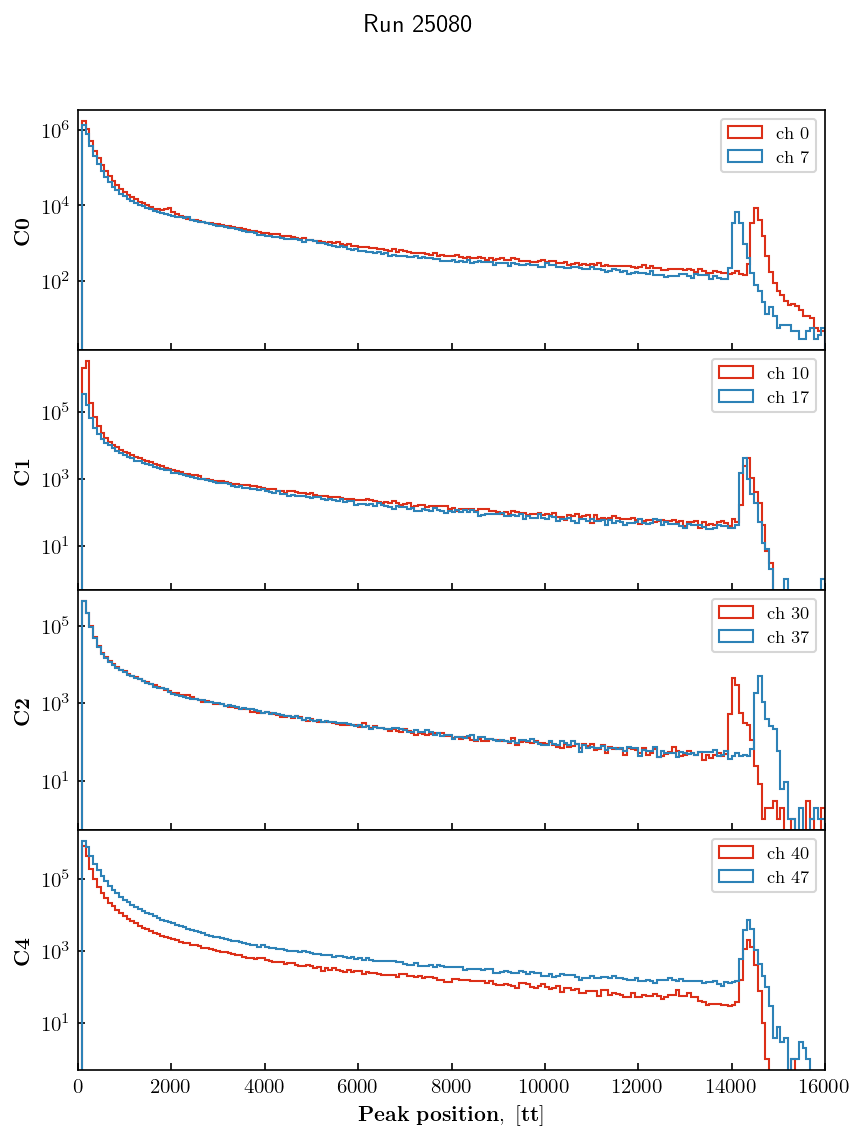

In [12]:
fig= plt.figure(figsize=[6, 8], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.20]
rect2 = [0.12, 0.30, 0.83, 0.20]
rect3 = [0.12, 0.50, 0.83, 0.20]
rect4 = [0.12, 0.70, 0.83, 0.20]

#xxs = np.arange(65536) * 16e-6
bins, lims = 200, [0, 16000]

ax1 = fig.add_axes(rect4)
ax2 = fig.add_axes(rect3)
ax3 = fig.add_axes(rect2)
ax4 = fig.add_axes(rect1)

ax1.xaxis.set_tick_params(labelbottom=False)
ax2.xaxis.set_tick_params(labelbottom=False)
ax3.xaxis.set_tick_params(labelbottom=False)

ax1.hist(hs[0], bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 0}$')
ax1.hist(hs[1], bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 7}$')

ax2.hist(hs[2], bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 10}$')
ax2.hist(hs[3], bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 17}$')

ax3.hist(hs[4], bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 30}$')
ax3.hist(hs[5], bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 37}$')

ax4.hist(hs[6], bins, lims, histtype='step', color=c1, label=r'$\mathrm{ch\ 40}$')
ax4.hist(hs[7], bins, lims, histtype='step', color=c2, label=r'$\mathrm{ch\ 47}$')

#lims = [0e3, 25e3 * 16e-6]
ax1.set_xlim(lims)
ax2.set_xlim(lims)
ax3.set_xlim(lims)
ax4.set_xlim(lims)

ylims = [0, 500e3]
#ax1.set_ylim(ylims)
#ax2.set_ylim(ylims)
#ax3.set_ylim(ylims)
#ax4.set_ylim(ylims)

ax1.legend(loc='best', fontsize='small')
ax2.legend(loc='best', fontsize='small')
ax3.legend(loc='best', fontsize='small')
ax4.legend(loc='best', fontsize='small')


ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

#ax1.set_yticks(np.arange(2500, 10001, 2500))
#ax2.set_yticks(np.arange(2500, 10001, 2500))
#ax3.set_yticks(np.arange(2500, 10001, 2500))
#ax4.set_yticks(np.arange(2500, 10001, 2500))

ax1.set_ylabel(r'$\mathrm{\bf C0}$')
ax2.set_ylabel(r'$\mathrm{\bf C1}$')
ax3.set_ylabel(r'$\mathrm{\bf C2}$')
ax4.set_ylabel(r'$\mathrm{\bf C4}$')

#ax3.set_xlabel(r'$\mathrm{\bf Time,\ [tt]}$')
ax4.set_xlabel(r'$\mathrm{\bf Peak\ position,\ [tt]}$')

fig.suptitle(f"Run 25080")

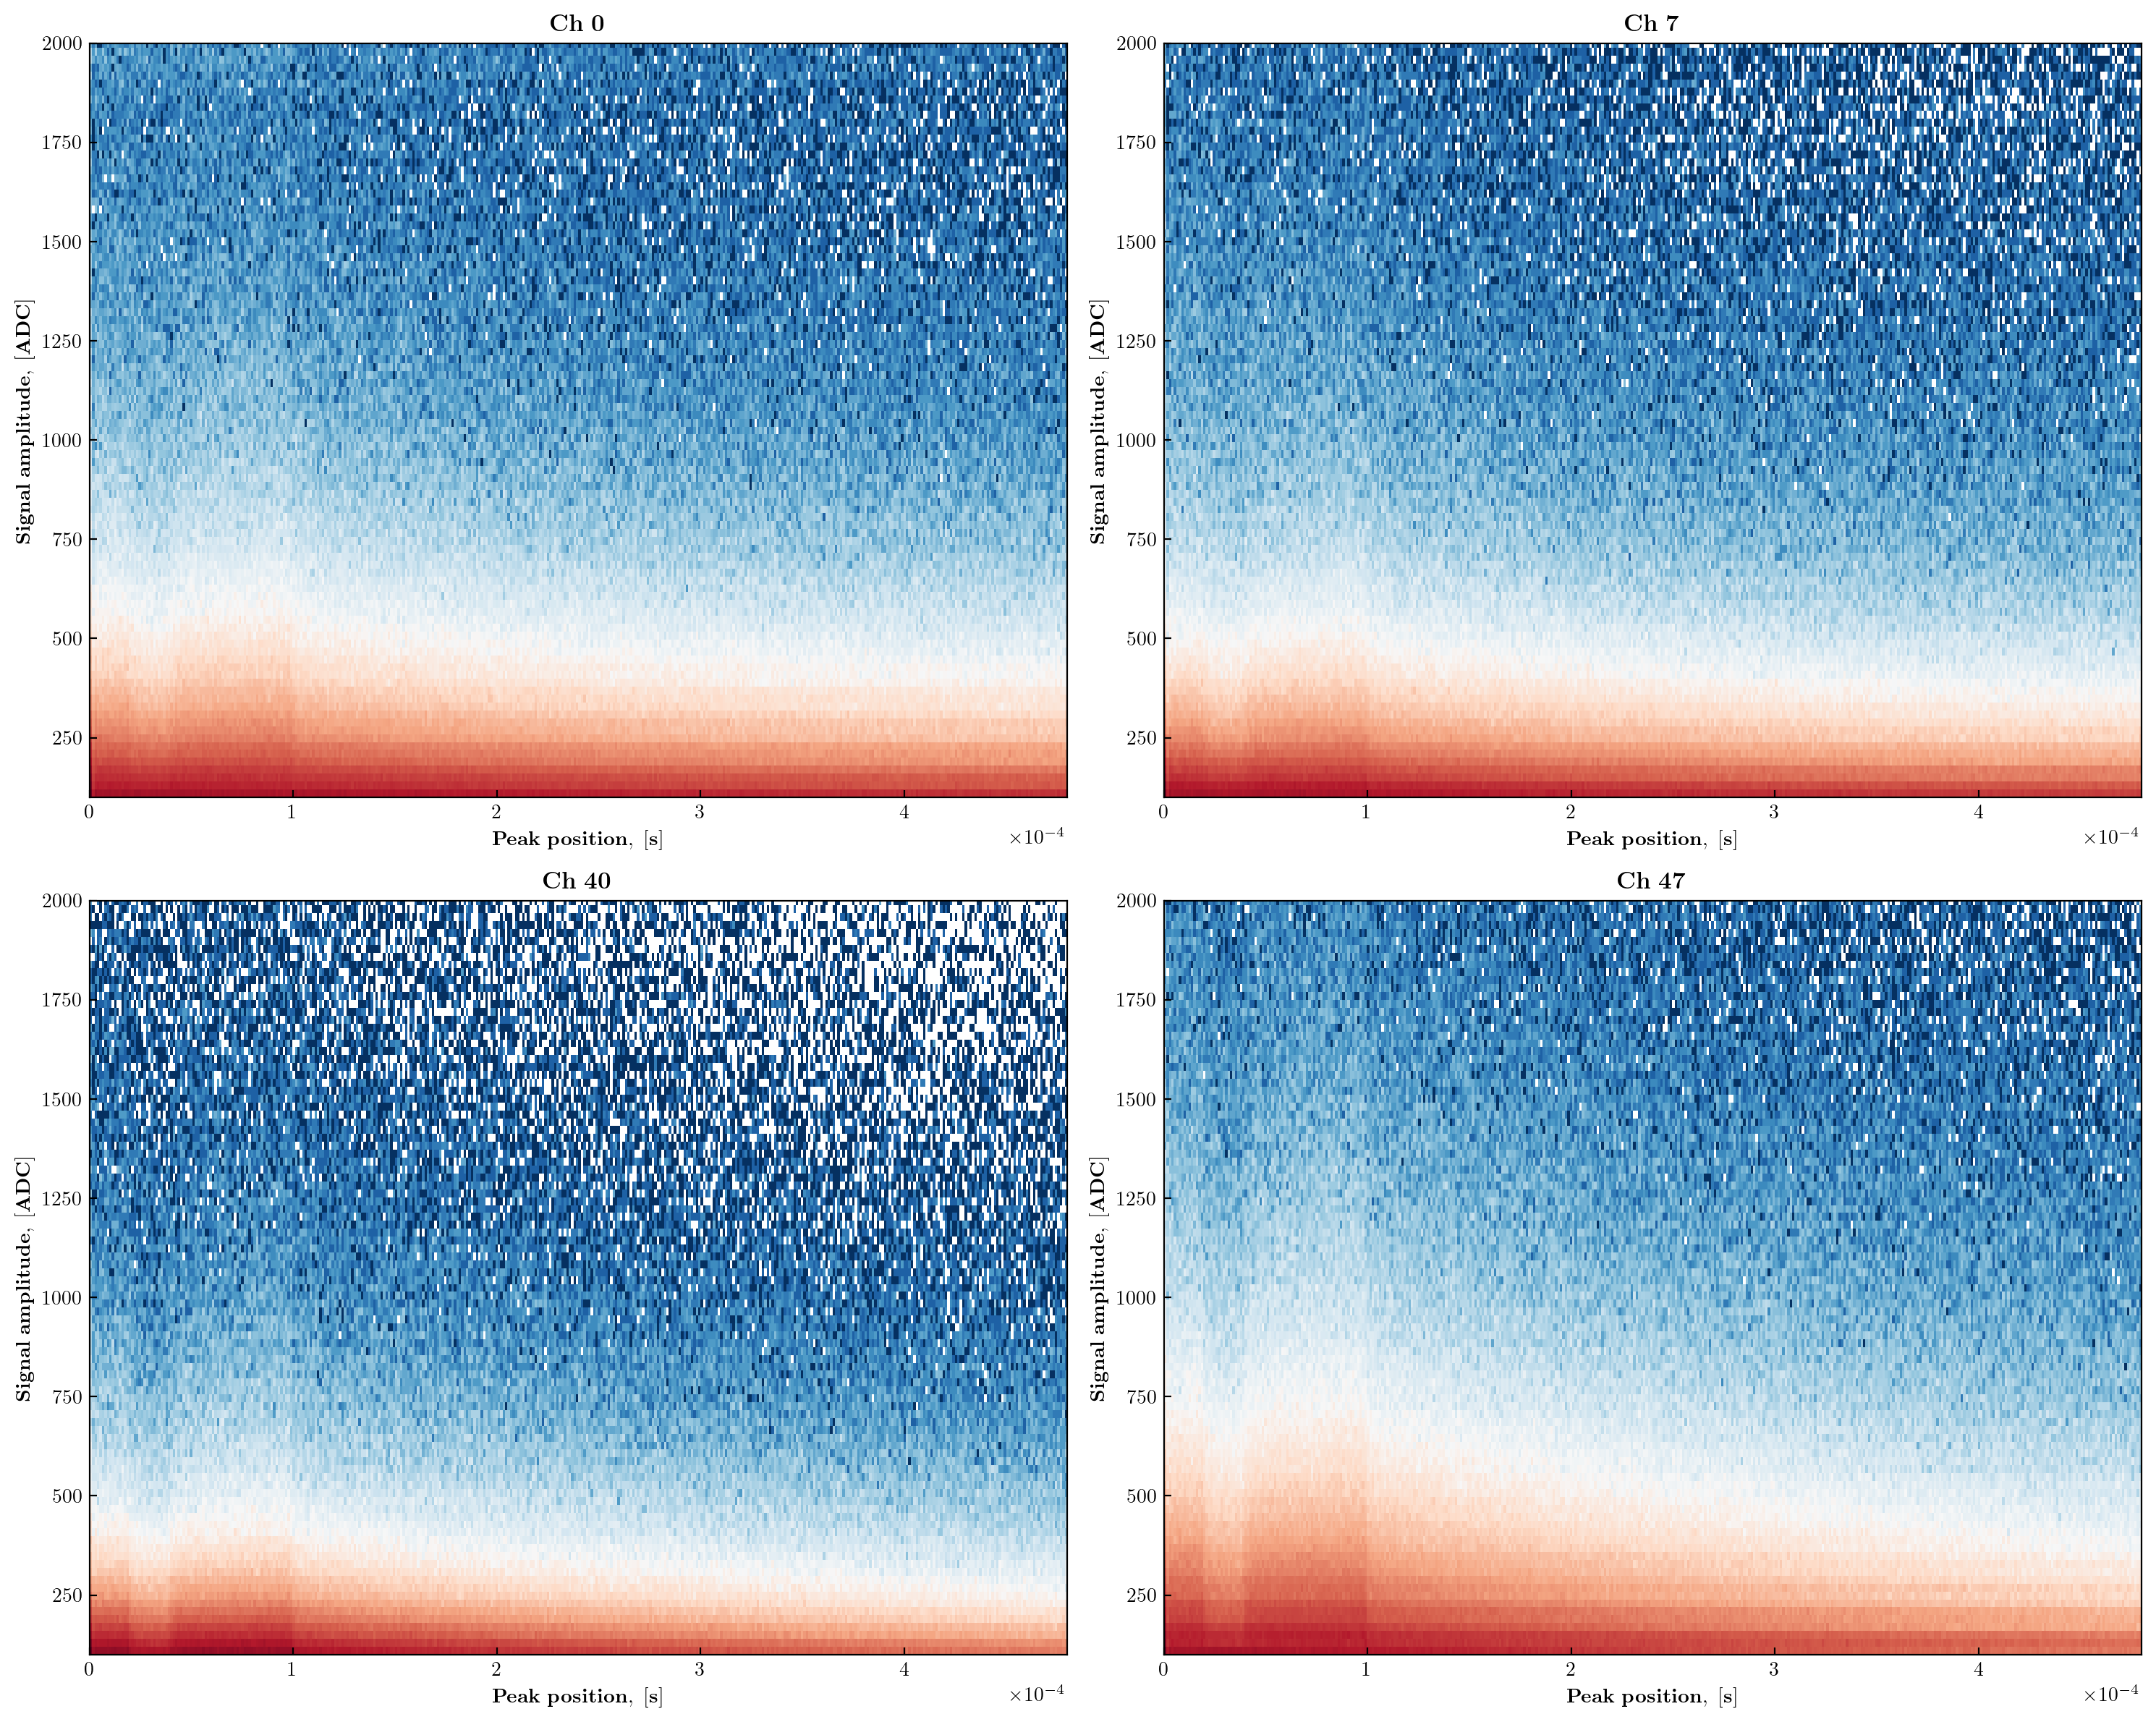

In [13]:
fig, axs = plt.subplots(2, 2, figsize=[15, 12], dpi=200)

axs[0, 0].hist2d(ps[0]*16e-9, hs[0], [400, 800], [[0, 3e4*16e-9],[100, 16e3]], norm = colors.LogNorm() ,cmap='RdBu_r') # norm = colors.LogNorm(), 
axs[0, 0].set_ylim(100, 2000)

axs[0, 1].hist2d(ps[1]*16e-9, hs[1], [400, 800], [[0, 3e4*16e-9],[100, 16e3]], norm = colors.LogNorm() ,cmap='RdBu_r') # norm = colors.LogNorm(), 
axs[0, 1].set_ylim(100, 2000)

axs[1, 0].hist2d(ps[6]*16e-9, hs[6], [400, 800], [[0, 3e4*16e-9],[100, 16e3]], norm = colors.LogNorm() ,cmap='RdBu_r') # norm = colors.LogNorm(), 
axs[1, 0].set_ylim(100, 2000)

axs[1, 1].hist2d(ps[7]*16e-9, hs[7], [400, 800], [[0, 3e4*16e-9],[100, 16e3]], norm = colors.LogNorm() ,cmap='RdBu_r') # norm = colors.LogNorm(), 
axs[1, 1].set_ylim(100, 2000)

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel(r'$\mathrm{\bf Peak\ position,\ [s]}$')
        axs[i,j].set_ylabel(r'$\mathrm{\bf Signal\ amplitude,\ [ADC]}$')

axs[0,0].set_title(r"$\mathrm{\bf Ch\ 0}$")
axs[0,1].set_title(r"$\mathrm{\bf Ch\ 7}$")

axs[1,0].set_title(r"$\mathrm{\bf Ch\ 40}$")
axs[1,1].set_title(r"$\mathrm{\bf Ch\ 47}$")
fig.tight_layout()

In [14]:
def get_fps(data, l1, r1, r2):
    fps, pes = [], []
    
    rising_edge         = np.argmax(np.gradient(data, axis=1), axis=1)
    bprompt, endprompt  = rising_edge+l1, rising_edge+r1
    eall                = rising_edge+r2
    #peakloc = rising_edge
    locmaxs = np.argmax(data, axis=1)
    goodw = []

    for i in range(len(data)):
        if locmaxs[i] < 100 or locmaxs[i] > 29900 or np.max(data[i])<100 or np.max(data[i])>14000: 
            goodw.append(i)
            continue
        
        pr = data[i][bprompt[i]:endprompt[i]]
        pr = pr[pr>0]
        ali = data[i][bprompt[i]:eall[i]]
        ali = ali[ali>0]
        fps.append( np.sum(pr)/ np.sum(ali))
        pes.append( np.sum(ali))
    
    peakloc = np.delete(rising_edge, goodw)
        #peakloc.append()

    return np.array(fps), np.array(pes), np.array(peakloc+5)

def get_fps_cosm(data, l1, r1, r2):
    fps, pes = [], []
    
    rising_edge         = np.argmax(np.gradient(data, axis=1), axis=1)
    bprompt, endprompt  = rising_edge+l1, rising_edge+r1
    eall                = rising_edge+r2
    #peakloc = rising_edge
    locmaxs = np.argmax(data, axis=1)
    goodw = []

    for i in range(len(data)):
        if locmaxs[i] < 200 or locmaxs[i] > 1900 or np.max(data[i])<200 or np.max(data[i])>14000: 
            goodw.append(i)
            continue
        
        pr = data[i][bprompt[i]:endprompt[i]]
        pr = pr[pr>0]
        ali = data[i][bprompt[i]:eall[i]]
        ali = ali[ali>0]
        if np.sum(ali)>3000:
            fps.append( np.sum(pr)/ np.sum(ali))
            pes.append( np.sum(ali))
    
    peakloc = np.delete(rising_edge, goodw)
        #peakloc.append()

    return np.array(fps), np.array(pes), np.array(peakloc+5)

In [21]:
fps, pes, peakloc = [], [], []

for file in files[-2:]:
    filename = path+file
    dat = np.load(filename, allow_pickle=True)
    dat = dat[:, 2000:20000]
    dat = dat.astype(np.int16)
    dat = substract_peds(dat)

    #p0, h0 = get_peaks(dat)
    fpsn, intsn, peakn = get_fps(dat, 10, 50, 120)

    fps.append(fpsn)
    pes.append(intsn)
    peakloc.append(peakn)
    #ps.append(p0)
    #hs.append(h0)
    del dat

/var/folders/jg/byqtgdmj23vd0pbdkc59djhr0000gn/T/ipykernel_30835/1778942448.py:20: RuntimeWarning: invalid value encountered in long_scalars
  fps.append( np.sum(pr)/ np.sum(ali))


In [22]:
filesc = ["adc_data_run_25066_ch_40_all.npy", "adc_data_run_25066_ch_47_all.npy"]

In [17]:
fpsc, pesc, peaklocc = [], [], []

for file in filesc:
    filename = path+file
    dat = np.load(filename, allow_pickle=True)
    print(dat.shape)
    dat = np.abs(dat)
    dat = substract_peds(dat)
    dat = dat.reshape(int(dat.shape[0]*dat.shape[1]/8192), 8192)
    print(dat.shape)

    #dat = dat.astype(np.int16)
    #dat = substract_peds(dat)

    #p0, h0 = get_peaks(dat)
    fpsn, intsn, peakn = get_fps_cosm(dat, 10, 50, 120)
    fpsc.append(fpsn)
    pesc.append(intsn)
    peaklocc.append(peakn)

    #ps.append(p0)
    #hs.append(h0)
    del dat

(4200, 262144)
(134400, 8192)
(4200, 262144)
(134400, 8192)


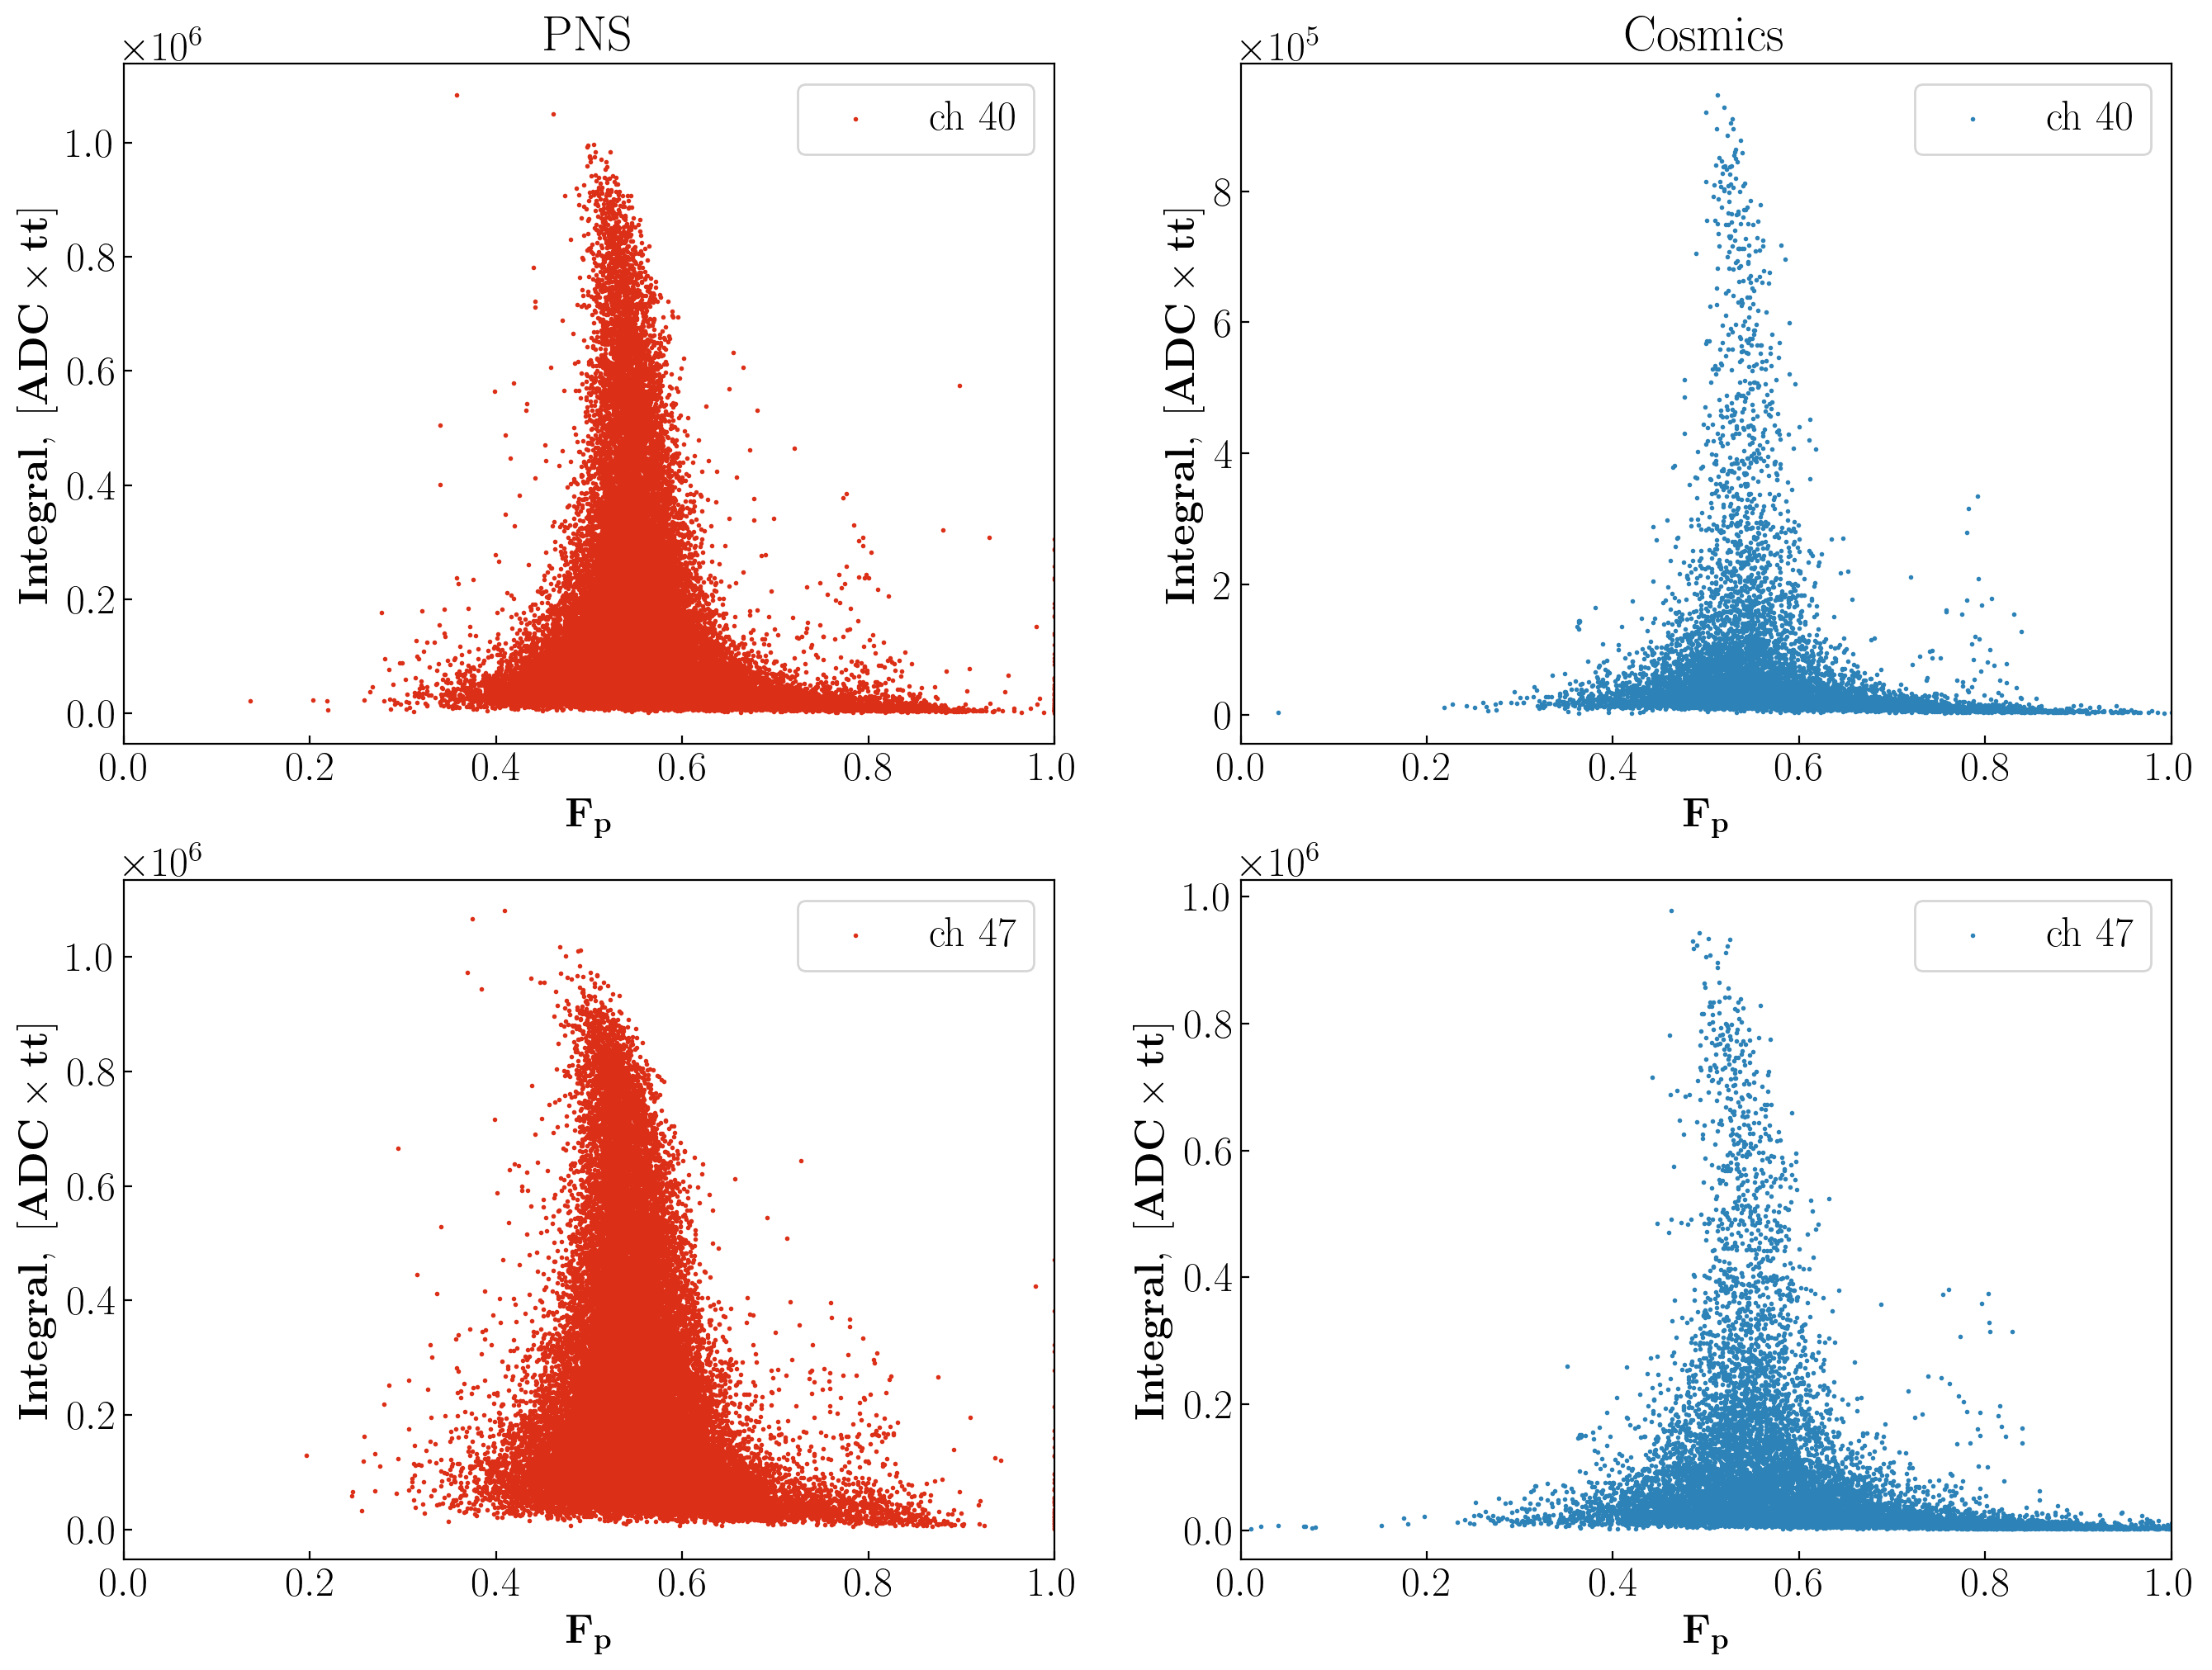

In [26]:
fig, axs = plt.subplots(2, 2, figsize=[16, 12], dpi=200)

axs[0,0].scatter(fps[0], pes[0], s=1, color=c1, label=r"$\mathrm{ch~40}$")
axs[0,0].set_xlim(0, 1)

axs[1,0].scatter(fps[1], pes[1], s=1, color=c1, label=r"$\mathrm{ch~47}$")
axs[1,0].set_xlim(0, 1)

axs[0,1].scatter(fpsc[0], pesc[0], s=1, color=c2, label=r"$\mathrm{ch~40}$")
axs[0,1].set_xlim(0, 1)

axs[1,1].scatter(fpsc[1], pesc[1], s=1, color=c2, label=r"$\mathrm{ch~47}$")
axs[1,1].set_xlim(0, 1)


axs[0,0].legend(loc='best')
axs[0,1].legend(loc='best')
axs[1,0].legend(loc='best')
axs[1,1].legend(loc='best')

axs[0,0].set_title(r"$\mathrm{PNS}$")
axs[0,1].set_title(r"$\mathrm{Cosmics}$")

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel(r"$\mathrm{\bf F_p}$")
        axs[i,j].set_ylabel(r"$\mathrm{\bf Integral, ~[ADC \times tt]}$")

Text(0.5, 1.0, '$\\mathrm{Cosmics}$')

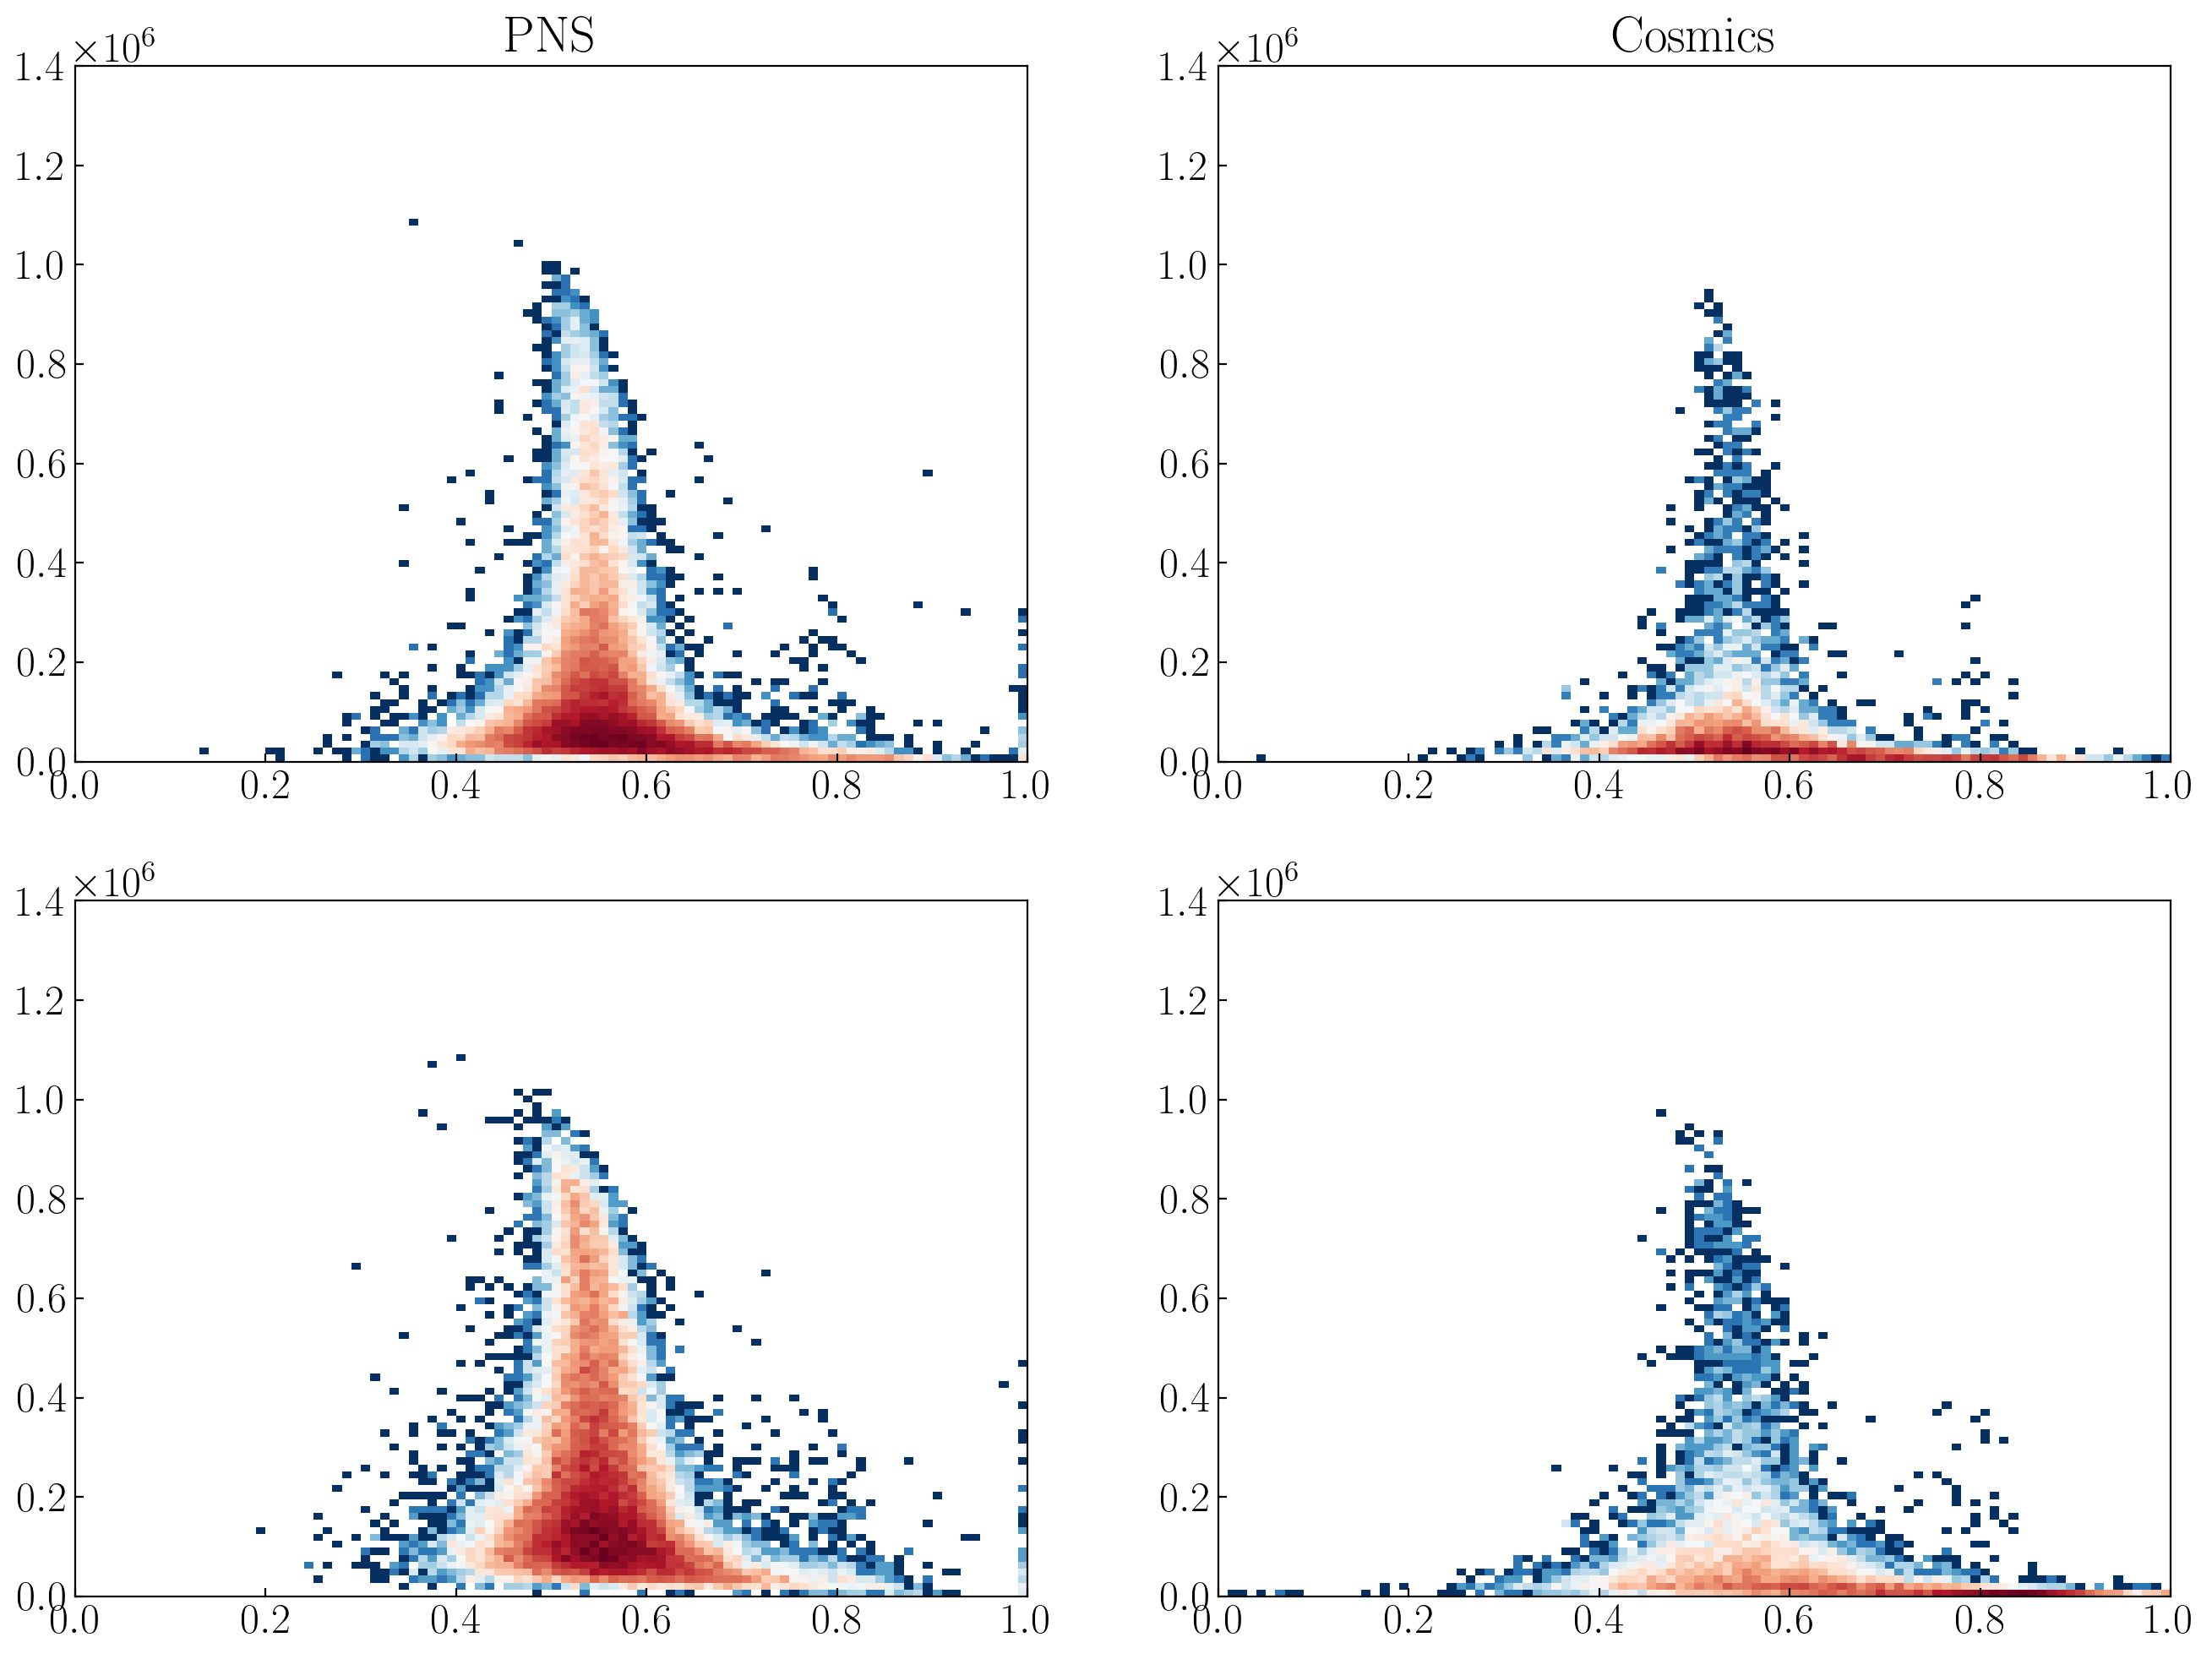

In [27]:
fig, axs = plt.subplots(2, 2, figsize=[16, 12], dpi=200)

bins, lims = [100, 100], [[0, 1], [0, 14e5]]

axs[0,0].hist2d(fps[0], pes[0], bins, lims, norm = colors.LogNorm() ,cmap='RdBu_r')
axs[0,0].set_xlim(0, 1)

axs[1,0].hist2d(fps[1], pes[1], bins, lims, norm = colors.LogNorm() ,cmap='RdBu_r')
axs[1,0].set_xlim(0, 1)

axs[0,1].hist2d(fpsc[0], pesc[0], bins, lims, norm = colors.LogNorm() ,cmap='RdBu_r')
axs[0,1].set_xlim(0, 1)

axs[1,1].hist2d(fpsc[1], pesc[1], bins, lims, norm = colors.LogNorm() ,cmap='RdBu_r')
axs[1,1].set_xlim(0, 1)


#axs[0,0].legend(loc='best')
#axs[0,1].legend(loc='best')
#axs[1,0].legend(loc='best')
#axs[1,1].legend(loc='best')

axs[0,0].set_title(r"$\mathrm{PNS}$")
axs[0,1].set_title(r"$\mathrm{Cosmics}$")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '$\\mathrm{Cosmics}$')

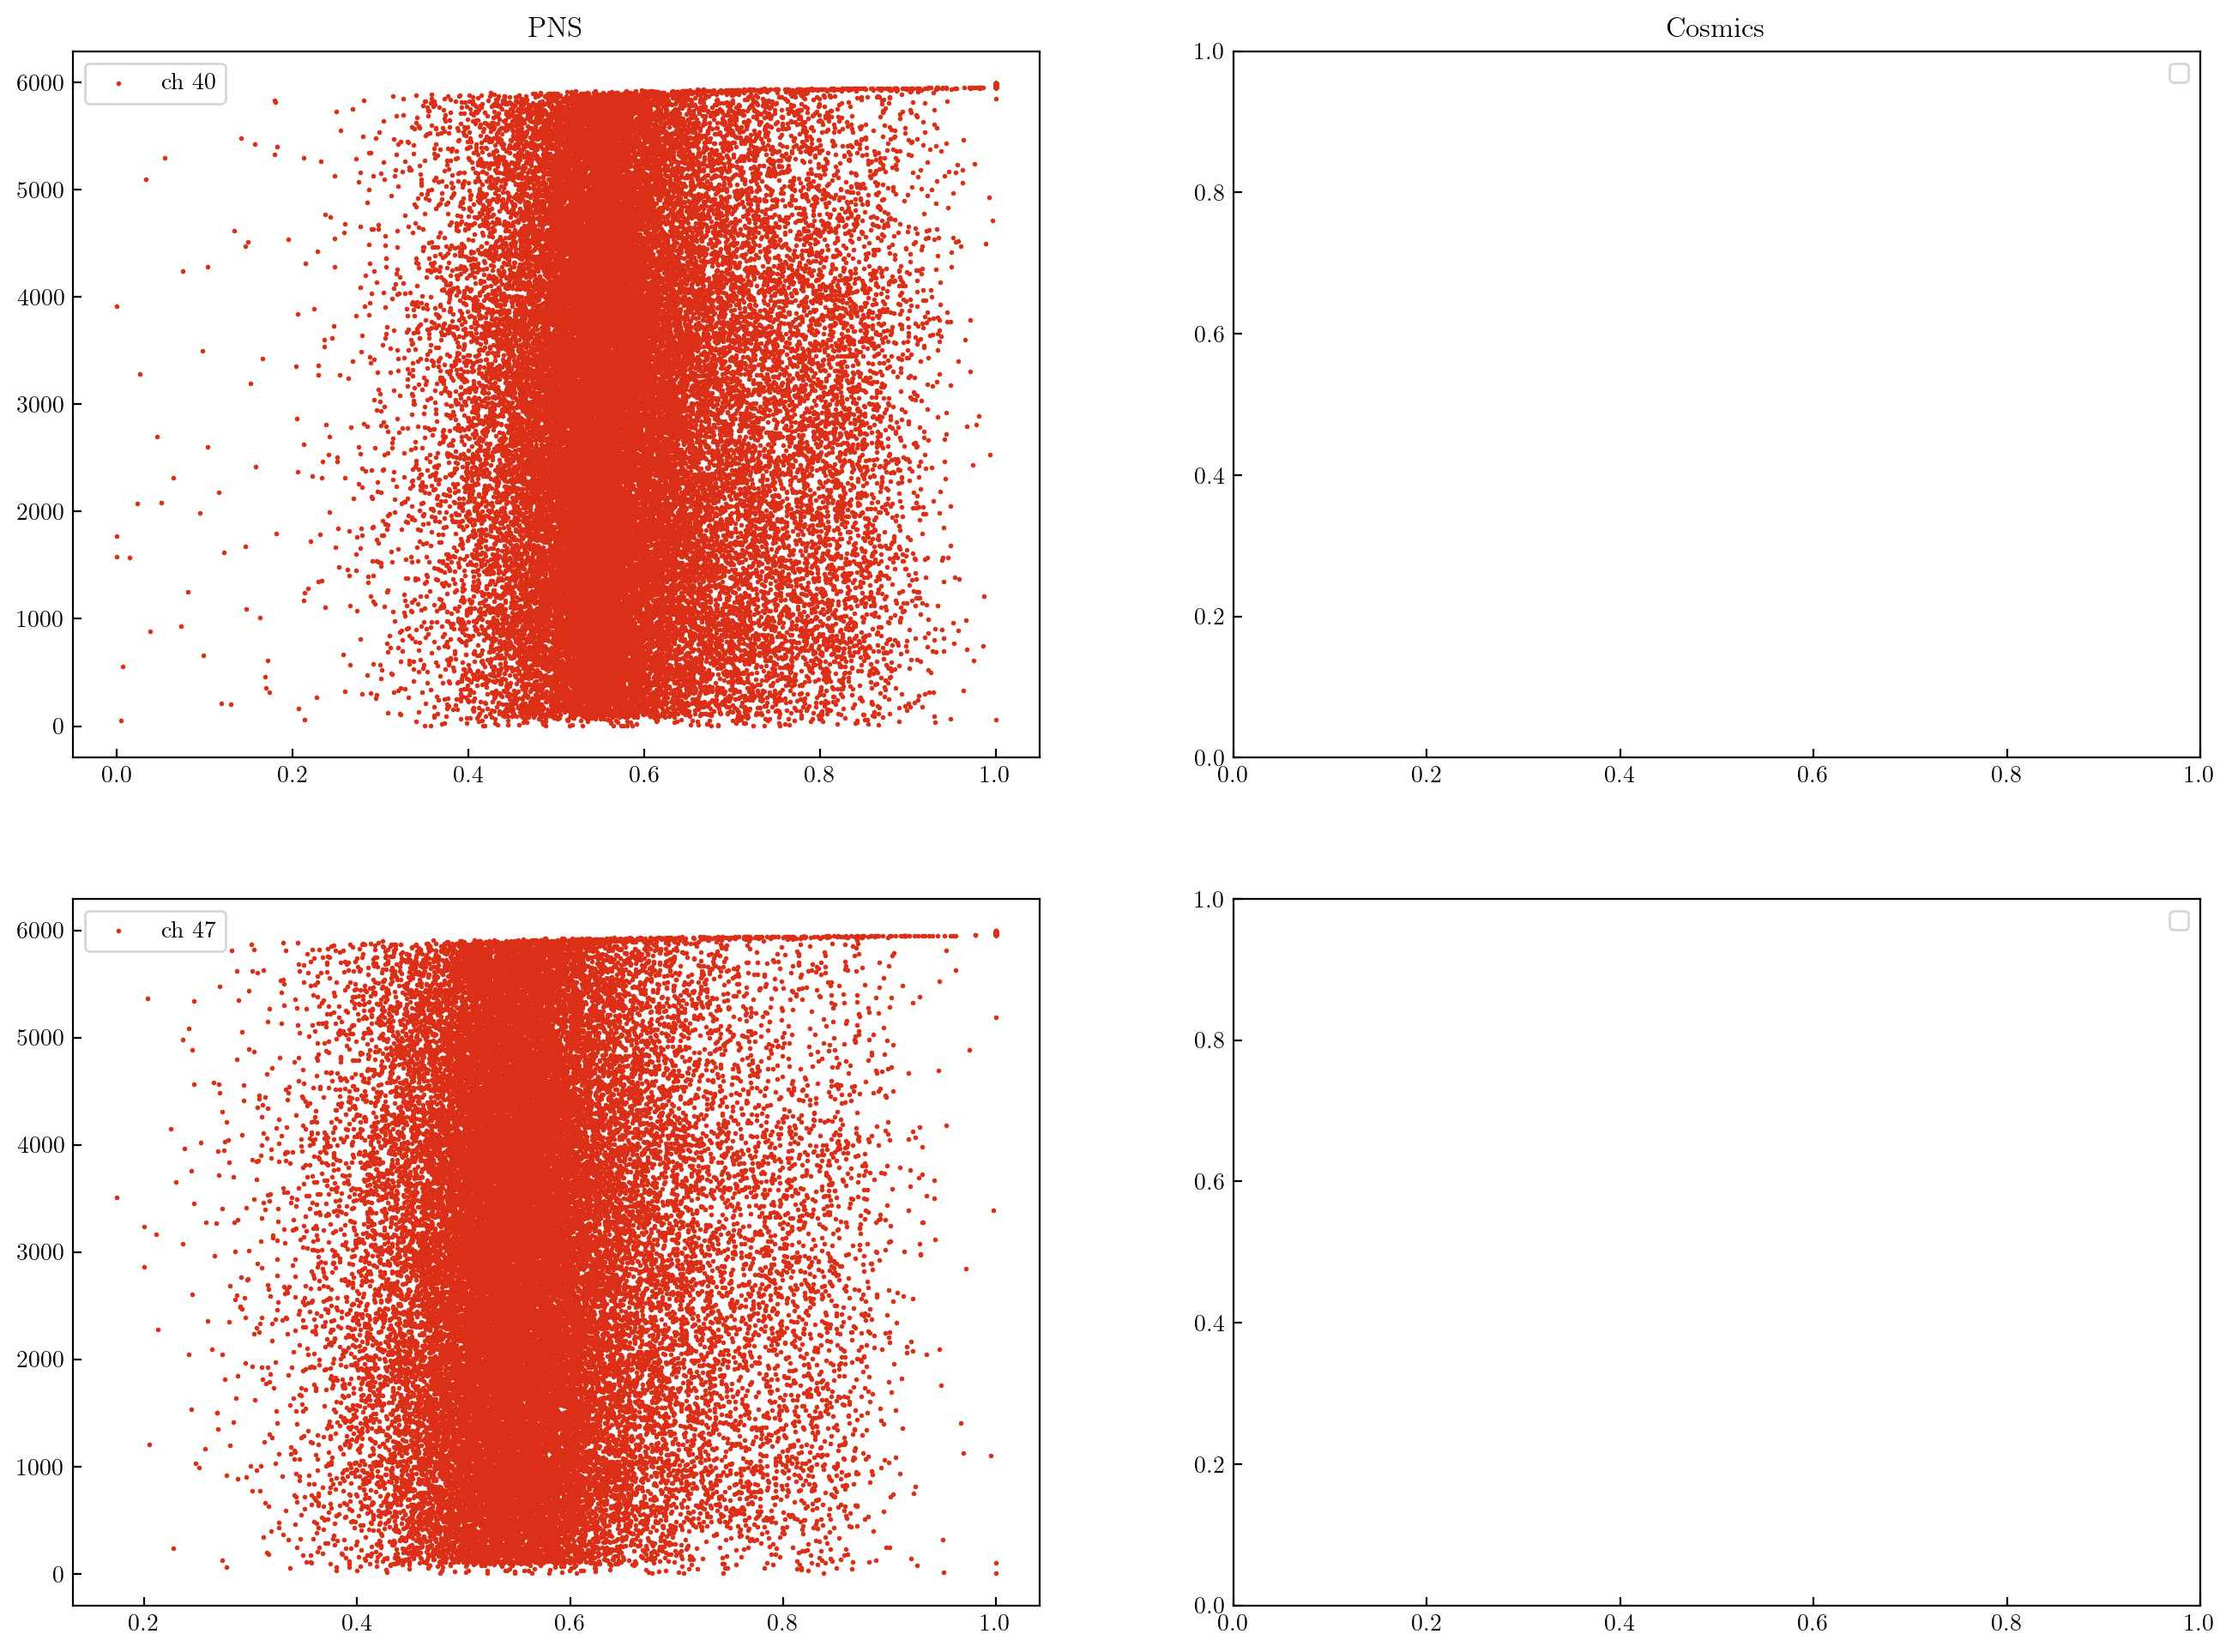

In [20]:
fig, axs = plt.subplots(2, 2, figsize=[16, 12], dpi=200)

axs[0,0].scatter(fps[0], peakloc[0], s=1, color=c1, label=r"$\mathrm{ch~40}$")
#axs[0,0].set_xlim(0, 1)

axs[1,0].scatter(fps[1], peakloc[1], s=1, color=c1, label=r"$\mathrm{ch~47}$")
#axs[1,0].set_xlim(0, 1)

#axs[0,1].scatter(fpsc[0], peaklocc[0], s=1, color=c2, label=r"$\mathrm{ch~40}$")
#axs[0,1].set_xlim(0, 1)

#axs[1,1].scatter(fpsc[1], peaklocc[1], s=1, color=c2, label=r"$\mathrm{ch~47}$")
#axs[1,1].set_xlim(0, 1)


axs[0,0].legend(loc='best')
axs[0,1].legend(loc='best')
axs[1,0].legend(loc='best')
axs[1,1].legend(loc='best')

axs[0,0].set_title(r"$\mathrm{PNS}$")
axs[0,1].set_title(r"$\mathrm{Cosmics}$")

ValueError: autodetected range of [nan, nan] is not finite

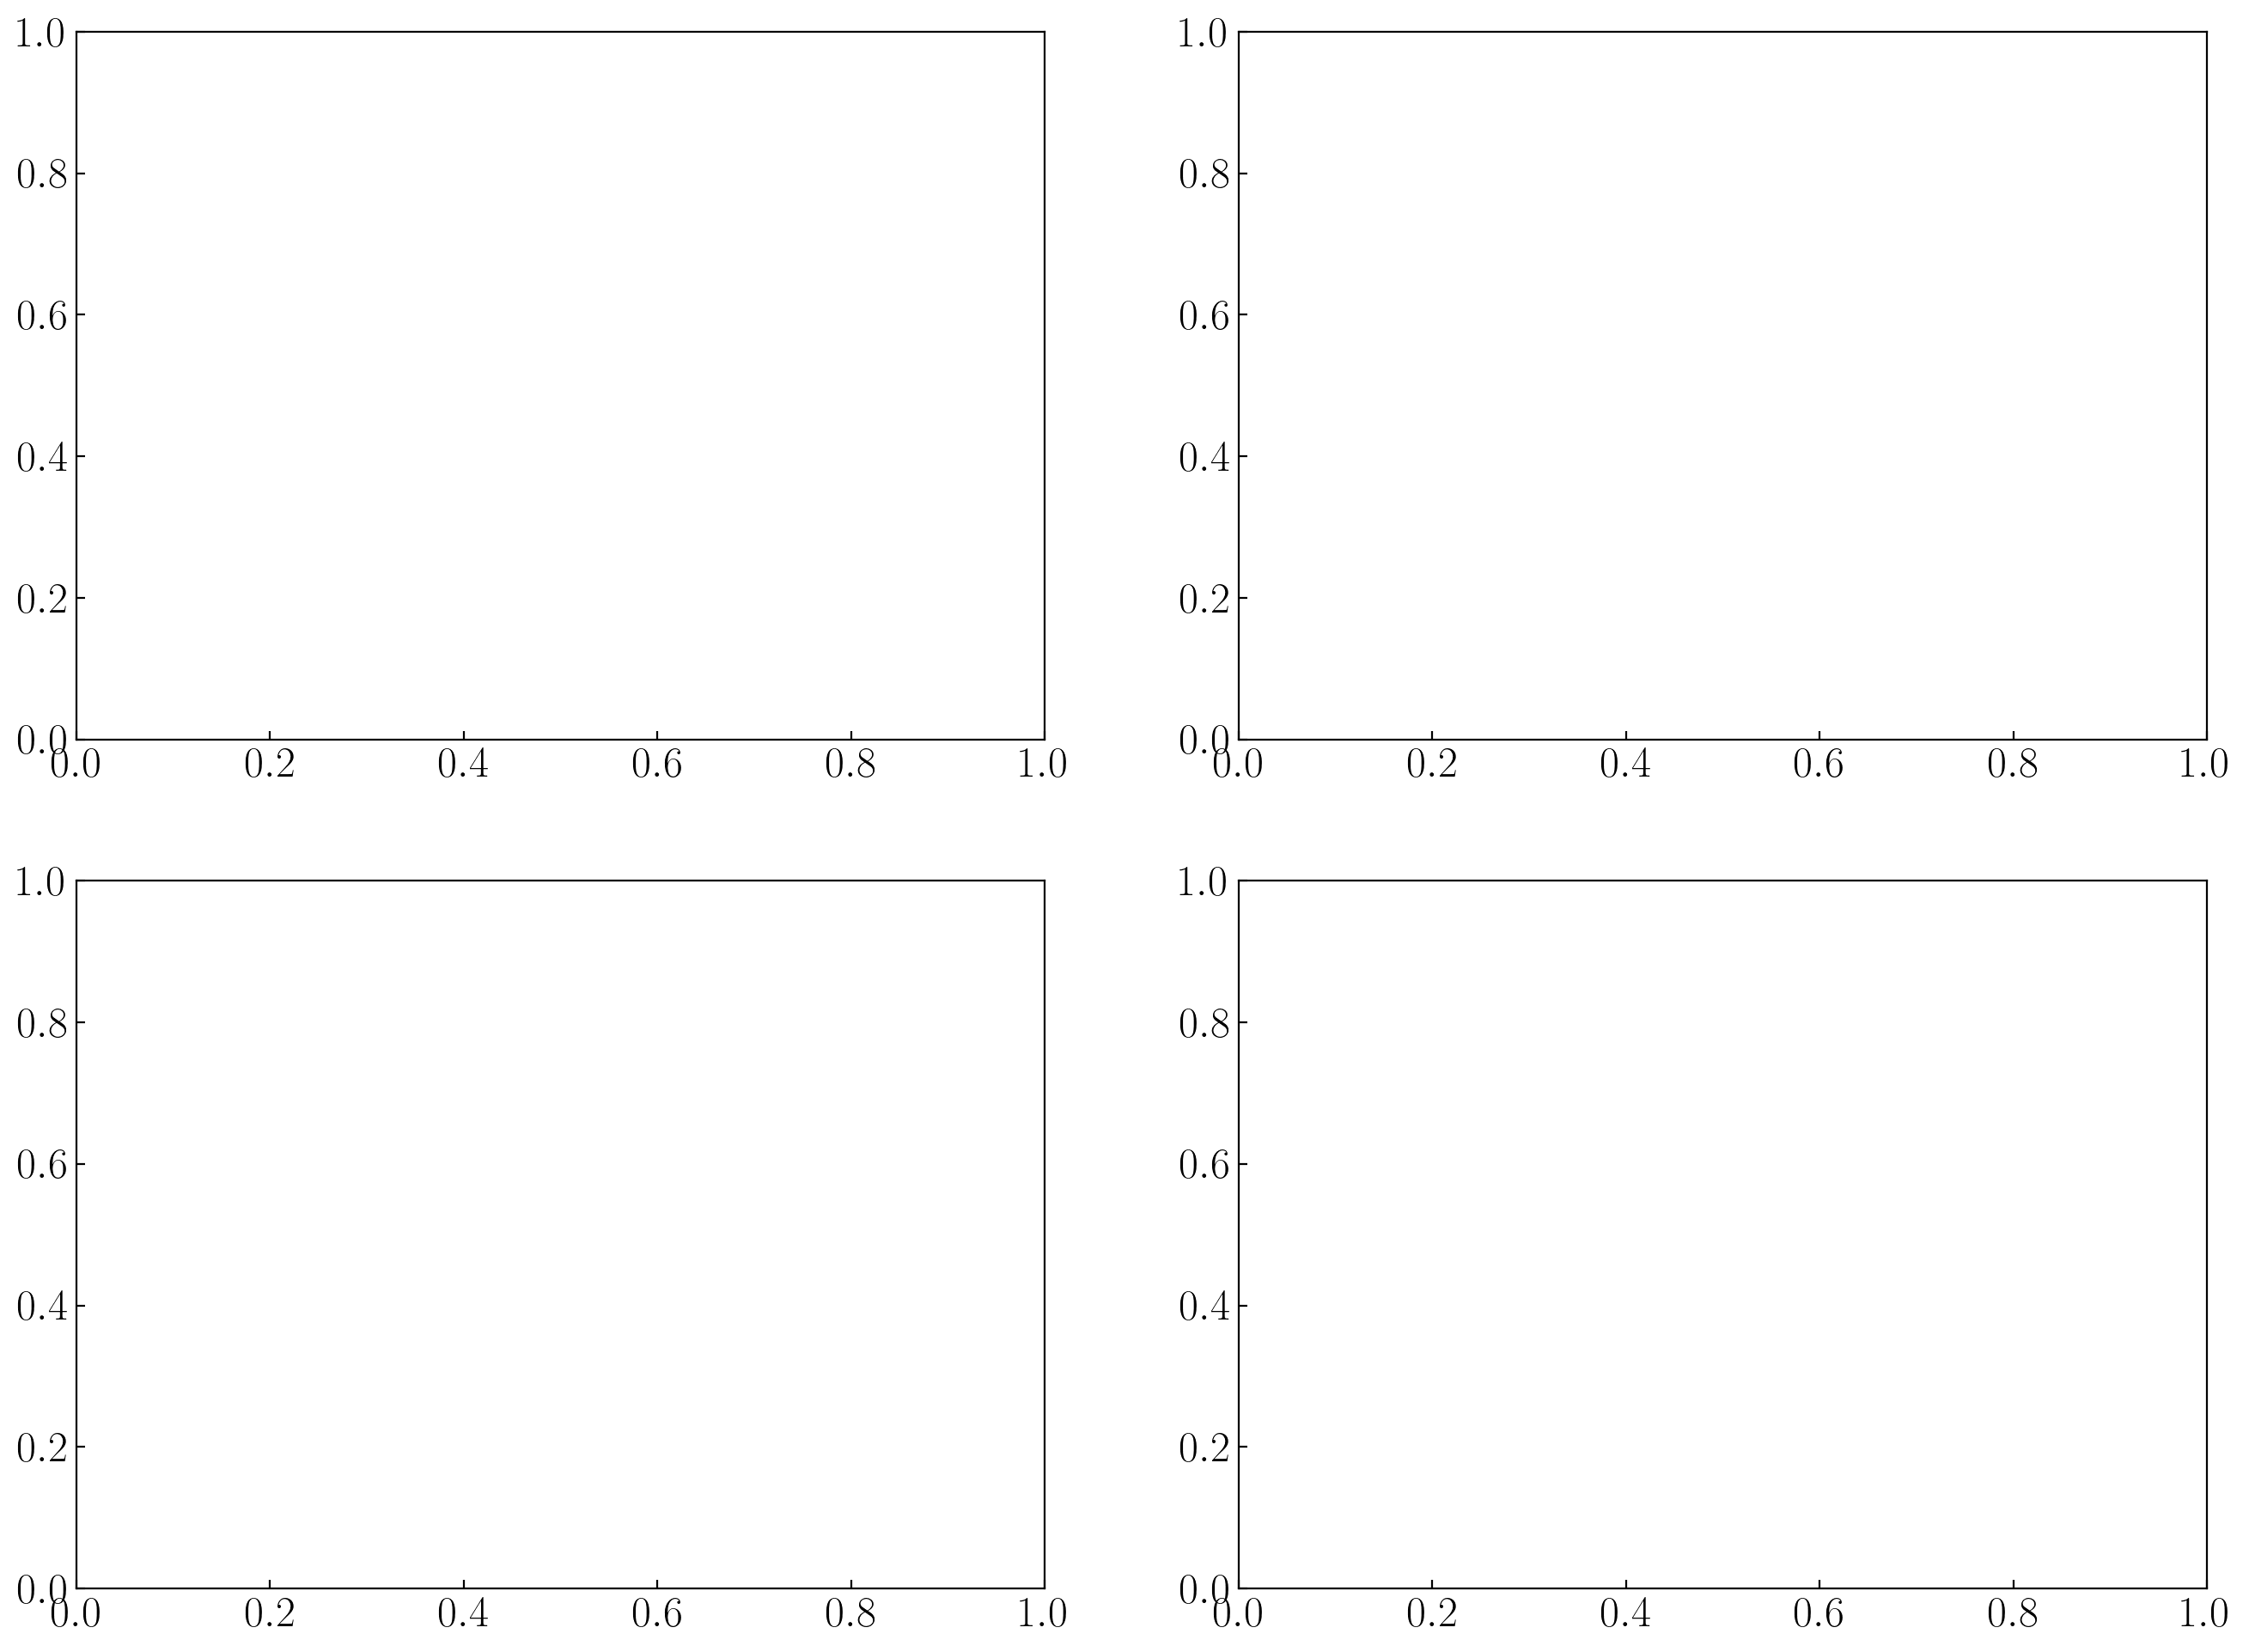

In [87]:
fig, axs = plt.subplots(2, 2, figsize=[16, 12], dpi=200)

axs[0,0].hist2d(fps[0], peakloc[0], s=1, color=c1, label=r"$\mathrm{ch~40}$")
#axs[0,0].set_xlim(0, 1)

axs[1,0].hist2d(fps[1], peakloc[1], s=1, color=c1, label=r"$\mathrm{ch~47}$")
#axs[1,0].set_xlim(0, 1)

#axs[0,1].scatter(fpsc[0], peaklocc[0], s=1, color=c2, label=r"$\mathrm{ch~40}$")
#axs[0,1].set_xlim(0, 1)

#axs[1,1].scatter(fpsc[1], peaklocc[1], s=1, color=c2, label=r"$\mathrm{ch~47}$")
#axs[1,1].set_xlim(0, 1)


axs[0,0].legend(loc='best')
axs[0,1].legend(loc='best')
axs[1,0].legend(loc='best')
axs[1,1].legend(loc='best')

axs[0,0].set_title(r"$\mathrm{PNS}$")
axs[0,1].set_title(r"$\mathrm{Cosmics}$")